In [6]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [7]:
# Reading the data
df = pd.read_csv('data/complaints.csv')

c:\Users\akaid\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
# Initial investiogation of the data
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-11-22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",OK,74447,Servicemember,NaN,Web,2022-11-22,In progress,Yes,NaN,6231498
1,2022-11-16,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,NJ,7093,NaN,NaN,Web,2022-11-16,In progress,Yes,NaN,6205383
2,2022-11-09,Debt collection,Credit card debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,"Genesis FS Card Services, Inc.",TX,75038,NaN,NaN,Web,2022-11-09,Closed with explanation,Yes,NaN,6182699
3,2022-11-07,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN,NaN,NORTHERN OHIO INVESTMENT COMPANY,MO,63031,NaN,Other,Web,2022-11-08,Untimely response,No,NaN,6173945
4,2022-11-07,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"R & R Collection Service, Inc.",MO,64154,NaN,NaN,Phone,2022-11-07,Untimely response,No,NaN,6175998


In [9]:
print(df.shape)

(3096756, 18)


In [10]:
col_list = df.columns.tolist()
# print(col_list)

''' Renaming the columns for ease of access'''
df = df.rename(columns={'Date received':'date_received', 'Product':'product', 'Sub-product':'sub_product', 'Issue':'issue', 'Sub-issue':'sub_issue', 'Consumer complaint narrative':'narrative', 'Company public response':'response_public', 'Company':'company', 'State':'state', 'ZIP code':'zip', 'Tags':'tags', 'Consumer consent provided?':'consent', 'Submitted via':'submitted_via', 'Date sent to company':'date_sent', 'Company response to consumer':'response_to_cust', 'Timely response?':'timely_resp', 'Consumer disputed?':'consumer_disputed', 'Complaint ID':'id'})
df.head()

,date_received,product,sub_product,issue,sub_issue,narrative,response_public,company,state,zip,tags,consent,submitted_via,date_sent,response_to_cust,timely_resp,consumer_disputed,id
0,2022-11-22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",OK,74447,Servicemember,NaN,Web,2022-11-22,In progress,Yes,NaN,6231498
1,2022-11-16,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,NJ,7093,NaN,NaN,Web,2022-11-16,In progress,Yes,NaN,6205383
2,2022-11-09,Debt collection,Credit card debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,"Genesis FS Card Services, Inc.",TX,75038,NaN,NaN,Web,2022-11-09,Closed with explanation,Yes,NaN,6182699
3,2022-11-07,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN,NaN,NORTHERN OHIO INVESTMENT COMPANY,MO,63031,NaN,Other,Web,2022-11-08,Untimely response,No,NaN,6173945
4,2022-11-07,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"R & R Collection Service, Inc.",MO,64154,NaN,NaN,Phone,2022-11-07,Untimely response,No,NaN,6175998


<AxesSubplot:xlabel='count', ylabel='response_to_cust'>

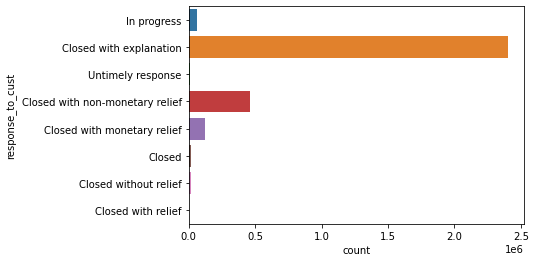

In [13]:
sb.countplot(data=df, y='response_to_cust')